# The Box Plot.

There are many explainations about Box plot the below mentioned is the most I like. It is short, crisp and to the point.

A Box Plot is the visual representation of the *statistical five number summary* of a given data set.

A Five Number Summary includes:

1. Minimum
2. First Quartile
3. Median (Second Quartile)
4. Third Quartile
5. Maximum

The Box plots are also known as *“Box and Whisker Plot”*. **John Turkey**, A Mathematician Introduced “Box and Whisker Plot” in 1969 as part of his toolkit for exploratory data analysis (Tukey, 1970), but it did not become widely known until formal publication (Tukey, 1977). The basic graphic form of the boxplot, the range-bar, was established in the early 1950’s Spear (1952, pg.164).  
“Box plots use robust summary statistics that are always located at actual data points, are quickly computable (originally by hand), and have no tuning parameters. They are particularly useful for comparing distributions across groups.” said *Hardley Wickham*.

Reference:
![](https://github.com/cdigap/FDA_Project/blob/master/box_Det.png?raw=true "Box Plot")

Let me try to explain *what's in the box ?*

The boxplot is made up of five components, carefully chosen to give a robust summary of the distribution
of a dataset:

* The median,
* Two hinges, the upper and lower fourths (quartiles),
* The data values adjacent to the upper and lower fences, which lie 1.5 times the inter-fourth range from the median,
* Two whiskers that connect the hinges to the fences, and
* (potential) out-liers, individual points further away from the median than the extremes.

In [30]:
import numpy as np
import pandas as pd 

from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt

import seaborn as sns

#Assigning the data File to dfile
  
dfile = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

colms = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Species']

# data File getting the Headers assigned.
data_file = pd.read_csv(dfile,names=colms)

# Details of each columns identified being generated and displayed.
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal_Length    150 non-null float64
Sepal_Width     150 non-null float64
Petal_Length    150 non-null float64
Petal_Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [4]:
data_file

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
data_file.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


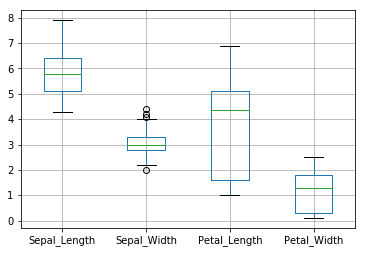

In [20]:
%matplotlib inline
data_file.boxplot()

Sepal_Length       AxesSubplot(0.125,0.125;0.168478x0.755)
Sepal_Width     AxesSubplot(0.327174,0.125;0.168478x0.755)
Petal_Length    AxesSubplot(0.529348,0.125;0.168478x0.755)
Petal_Width     AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

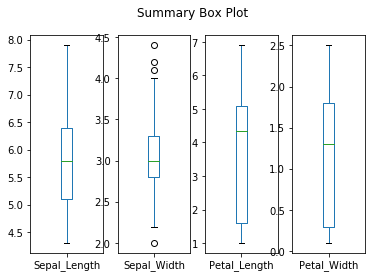

In [21]:
data_file.plot(kind='box', subplots = True, layout = (1,4), sharex = False, sharey = False, title='Summary Box Plot')

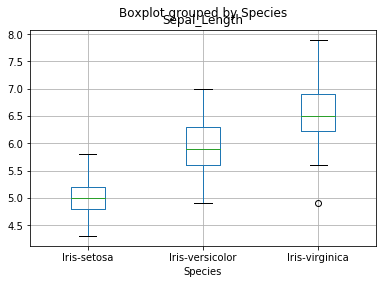

In [22]:
data_file.boxplot(column=['Sepal_Length'], by='Species')

As we can see with the above examples of box charts we can picturize the data in a better way to understand better.

Let us now understand terms quartile and percentile.

## Quartile: 
To understand Quartile lets understand Quantile.

### Quantile : 
The cut points dividing the range of probability distribution into continuous intervals with equal probability 
There are q-1 of q quantiles one of each k satisfying 0 < k < q 

#### Quartile : 
Quartile is a special case of quantile, quartiles cut the data set into four equal parts i.e. q=4 for quantiles so we have First quartile Q1, second quartile Q2(Median) and third quartile Q3

In [16]:
#finding out Quantile
data_file.Sepal_Length.quantile([0.25,0.5,0.75])

0.25    5.1
0.50    5.8
0.75    6.4
Name: Sepal_Length, dtype: float64

## Percentile:
 Is a measure used in statistics indicating the value below which a given percentage of observations in a group of observations fall.

Example: the 20th percentile of X is the value QX(0.20)

In [17]:
#Finding out Percentile
np.percentile(data_file.Sepal_Length, 25)  # Q1


5.0999999999999996

In [18]:
np.percentile(data_file.Sepal_Length, 50)  # median


5.7999999999999998

In [19]:
np.percentile(data_file.Sepal_Length, 75)  # Q3


6.4000000000000004

In [14]:
#With Describe function we are get all the information in one command.

data_file.Sepal_Length.describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: Sepal_Length, dtype: float64

In [32]:
sns.catplot(x="Sepal_Length", y="Petal_Length", kind="boxen", jitter=False, data=data_file.sort_values("Species"))

AttributeError: module 'seaborn' has no attribute 'catplot'

In [28]:
!pip install -U seaborn

  Using cached https://files.pythonhosted.org/packages/a8/76/220ba4420459d9c4c9c9587c6ce607bf56c25b3d3d2de62056efe482dadc/seaborn-0.9.0-py3-none-any.whl
  Found existing installation: seaborn 0.8
    Uninstalling seaborn-0.8:
      Successfully uninstalled seaborn-0.8


## Reference:
1. https://chartio.com/resources/tutorials/what-is-a-box-plot/
2. https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data 
3. https://stackoverflow.com/questions/13051428/how-to-display-images-in-markdown-files-of-github
